#Гауссовы квадратуры
Будем считать интеграл:

$$\int_{1}^{-1} (7x^3-8x^2-3x+3) dx$$

###Задание 1.1

In [9]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.special import roots_legendre, roots_sh_legendre, roots_chebyt
from math import cos, pi

# точное значение интеграла
exact = 2/3

# численное интегрирование методом средних прямоугольников
def f1(x):
    return 7*x**3 - 8*x**2 - 3*x + 3

def midpoint_rule(func, a, b, N):
    s = 0
    interv = np.linspace(a, b, N)
    for i in range(len(interv) - 1):
        delta = (b - a) / (N - 1)
        point = (interv[i + 1] - interv[i]) / 2 + interv[i]
        s += func(point) * delta
    return s

result_unif = 1
N = 1000
while abs(exact-result_unif)/exact > 1e-9:
    result_unif = midpoint_rule(f1, -1, 1, N)
    N *= 2
print('Результат: {0}, относительная точность: {1}, количество узлов: {2}'
          .format(result_unif, abs(exact - result_unif) / exact, N))

Результат: 0.6666666669921708, относительная точность: 4.882562687491543e-10, количество узлов: 256000


In [10]:
# используем метод квадратур, весовая функция: w(x) = 1
# полиномы Лежандра 

result_quadr = []
for n in range(1, 7):
    s = 0
    nodes, weights = roots_legendre(n)
    for x, w in zip(nodes, weights):
        s += w * f1(x)
    print('Результат: {0}, относительная точность: {1}, количество узлов: {2}'
          .format(s, abs(exact - s) / exact, n))

Результат: 6.0, относительная точность: 8.0, количество узлов: 1
Результат: 0.6666666666666674, относительная точность: 1.1657341758564144e-15, количество узлов: 2
Результат: 0.6666666666666639, относительная точность: 4.163336342344337e-15, количество узлов: 3
Результат: 0.6666666666666667, относительная точность: 1.6653345369377348e-16, количество узлов: 4
Результат: 0.6666666666666685, относительная точность: 2.831068712794149e-15, количество узлов: 5
Результат: 0.6666666666666695, относительная точность: 4.3298697960381105e-15, количество узлов: 6


Для достижения предложенной относительной точности (1e-10) первому методу требуется количество узлов N порядка 2*10^5. Второму методу, методу Гауссовых квадратур, требуется N < 10 для достижения лучшей относительной точности. Ясно, что второй метод работает гораздо эффективнее.

###Задание 1.2
Тот же интеграл, но на интервале от 0 до 10.
$$ \int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx $$
Чтобы воспользоваться квадратурами сделаем замену: $$x=10t$$
$$ \int_{0}^{1} 10\cdot(7000t^3 - 800t^2 - 30t + 3) dx $$


In [11]:
# точное значение
exact = 44140/3

# будем использовать смещённые полиномы Лежандра
def f1_mod(x):
    return 10*(7000*x**3 - 800*x**2 - 30*x + 3)

n = 4
nodes, weights = roots_sh_legendre(n)
result_quadr = 0
for x, w in zip(nodes, weights):
    result_quadr += w*f1_mod(x)
print('Результат: {0}, относительная точность: {1}, количество узлов: {2}'
          .format(result_quadr, abs(exact - result_quadr) / exact, n))


Результат: 14713.333333333332, относительная точность: 1.2362864092971384e-16, количество узлов: 4


###Задание 1.3
$$\int_{0}^{2\pi}\frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}$$
Замена: $$x=2\pi t$$

$$\int_{0}^{1}\frac{cos(2\pi t) dt }{\sqrt{1 - t^2}}$$

Воспользуемся полиномами Чебышёва первого рода. Они "работают" на отрезке (-1, 1). Заметим, что подынтегральная функция симметрична, поэтому, чтобы найти значение интеграла на отрезке (0, 1), поделим полученный ответ на 2.




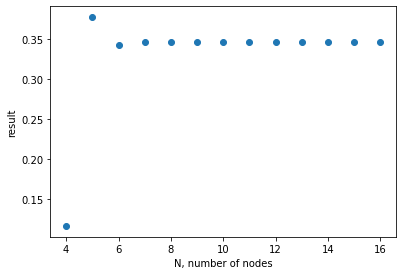

Посмотрим, как меняется результат в увеличением максимальной степени базисного полинома:
разность соседних значений: 0.26210747311731186, макс. степень полинома N: 5
разность соседних значений: -0.034626084704832305, макс. степень полинома N: 6
разность соседних значений: 0.002943012632708686, макс. степень полинома N: 7
разность соседних значений: -0.00017532664946007248, макс. степень полинома N: 8
разность соседних значений: 7.748746187474786e-06, макс. степень полинома N: 9
разность соседних значений: -2.646026523445144e-07, макс. степень полинома N: 10
разность соседних значений: 7.198484308634789e-09, макс. степень полинома N: 11
разность соседних значений: -1.5980233802892485e-10, макс. степень полинома N: 12
разность соседних значений: 2.95113933290736e-12, макс. степень полинома N: 13
разность соседних значений: -4.579669976578771e-14, макс. степень полинома N: 14
разность соседних значений: 3.3306690738754696e-16, макс. степень полинома N: 15
разность соседних значений: 2.220

In [19]:
result = []
for n in range(4, 17):
  s = 0
  nodes, weights = roots_chebyt(n)
  for x, w in zip(nodes, weights):
    s += w * cos(2*pi*x)
  result.append(s/2)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(range(4, 17), result, 'o')
ax.set_xlabel('N, number of nodes')
ax.set_ylabel('result')
plt.show()

print('Посмотрим, как меняется результат в увеличением максимальной степени базисного полинома:')
# посмотрим разницу соседних значений
for i, n in zip(range(len(result)), range(4, 17)):
  if i != len(result)-1:
    print('разность соседних значений: {0}, макс. степень полинома N: {1}'. format(result[i+1]-result[i], n+1))

# на графике видно, что результат практически не меняется, начиная с N = 10. Точность ~ 1e-16 достигается при N = 15. 
n = 15
nodes, weights = roots_chebyt(n)
result = 0
for x, w in zip(nodes, weights):
    result += w * cos(2*pi*x)
print('Результат: {0}, количество узлов: ~{1}'
          .format(result/2, n))



Результат: 0.34601015881226416, количество узлов: ~15

#Уравнение Фредгольма
###Задание 2.1
Решим уравнение с помощью квадратур.
$$f(x) = sin(\pi x)  + \frac{1}{2}\int_0^1f(t)dt$$
Затем сравним полученный результат с точным решением:
$$f(x) = sin(\pi x) + \frac{2}{\pi}$$


ошибка: 0.0007657482051929123, количество узлов: 3
ошибка: 7.849635628988109e-08, количество узлов: 5
ошибка: 2.5096934653706247e-15, количество узлов: 10
ошибка: 3.599246473628376e-15, количество узлов: 17
ошибка: 3.014005036771789e-15, количество узлов: 20
ошибка: 5.485220867312013e-15, количество узлов: 25


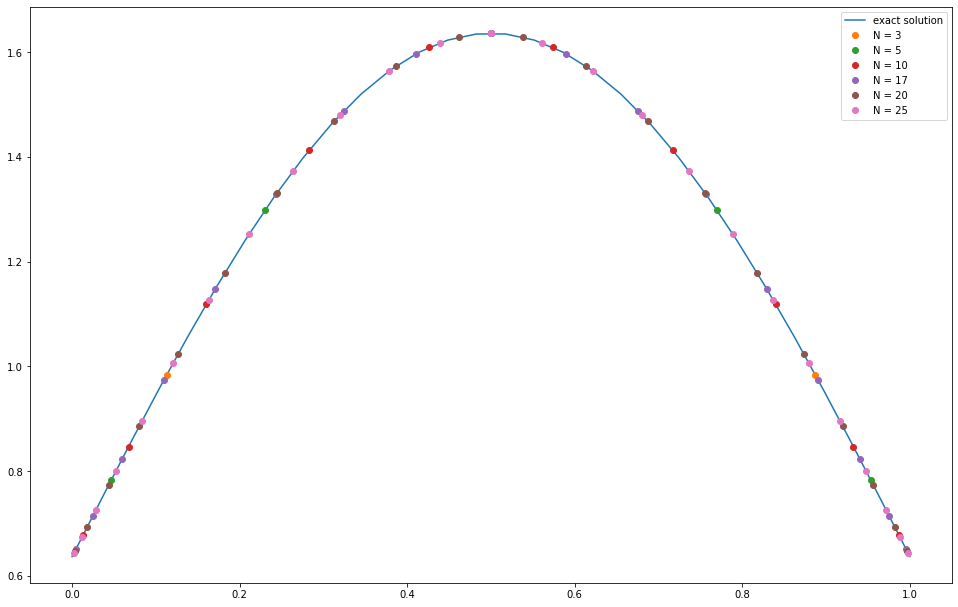

In [20]:
def fredholm_solve(n):
    lmbd = 1 / 2
    # весовая функция w(x)=1, исп смещённые полиномы Лежандра
    # equation: (lmbd*matrix - E)f = -g
    nodes, weights = roots_sh_legendre(n)
    matrix = np.zeros((n, n))
    for i in range(len(weights)):
        matrix[:, i] = weights[i]
    lhs = lmbd*matrix - np.eye(n)
    rhs = - np.sin(pi*nodes)
    result = LA.solve(lhs, rhs)
    return result, nodes

def exact_result(x):
    return np.sin(pi*x) + 2/pi

fig = plt.figure(figsize=[16,10])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
z = np.linspace(0, 1, 30)
ax.plot(z, exact_result(z), label='exact solution')
for n in [3, 5, 10, 17, 20, 25]:
    result, nodes = fredholm_solve(n)
    ax.plot(nodes, result, 'o', label='N = {}'.format(n))
    # ошибку считаю как норму вектора разности точного решения и решения, полученного численным методом
    print('ошибка: {0}, количество узлов: {1}'.format(LA.norm(result - exact_result(nodes)), n))
plt.legend()
plt.show()

На N ~ 10 (максимальная степень базисного полинома) практически достигается точность машинного эпсилон.
Далее точность не улучшается, поэтому оптимально остановиться на N = 10.

###Задание 2.2
a) Интерполировать значения, полученные в предыдущем задании, на равномерной сетке длиной 50.

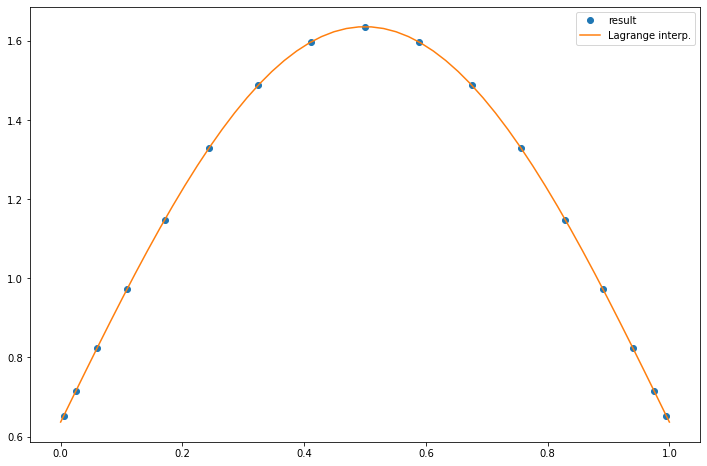

In [0]:
# для интерполяции используем полиномы Лагранжа n-1 степени
n = 17
result, nodes = fredholm_solve(n)
z = np.linspace(0, 1, 50)

def lagrange_pol(z, x, y, m):
    L = 0
    for j in range(len(y)):
        l = 1
        for p in range(m + 1):
            if p == j:
                continue
            l *= (z - x[p]) / (x[j] - x[p])
        L += y[j] * l
    return L

plt.figure(figsize=[12,8])
plt.plot(nodes, result, 'o', label='result')
plt.plot(z, lagrange_pol(z, nodes, result, len(result)-1), label='Lagrange interp.')
plt.legend()
plt.show()

  

b) Для вычисления функции, являющейся численным решением уравнения, использовать следующую формулу:
$$f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)$$

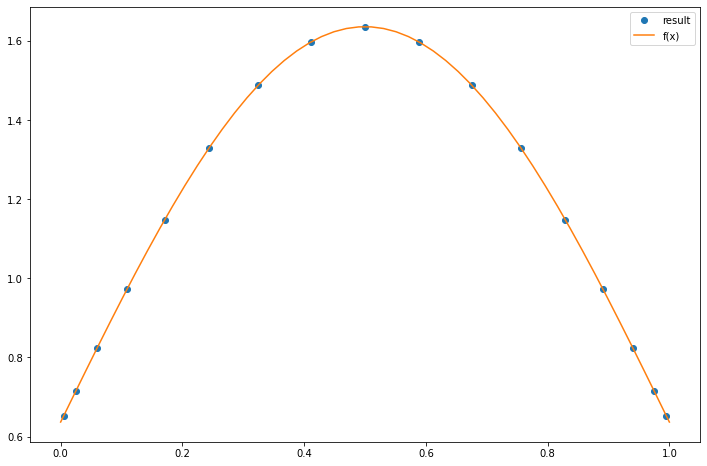

In [0]:
def func(z, n):
  # qudratures formula
    lmbd = 1/2
    result, nodes = fredholm_solve(n)
    weights = roots_sh_legendre(n)[1]
    s = 0
    for i in range(n):
        s += weights[i]*result[i]
    return np.sin(pi * z) + lmbd * s

plt.figure(figsize=[12,8])
plt.plot(nodes, result, 'o', label='result')
plt.plot(z, func(z, n=17), label='f(x)')
plt.legend()
plt.show()

c) Сравним фукнции, полученные в предыдущих пунктах, с точным решением уравнения.

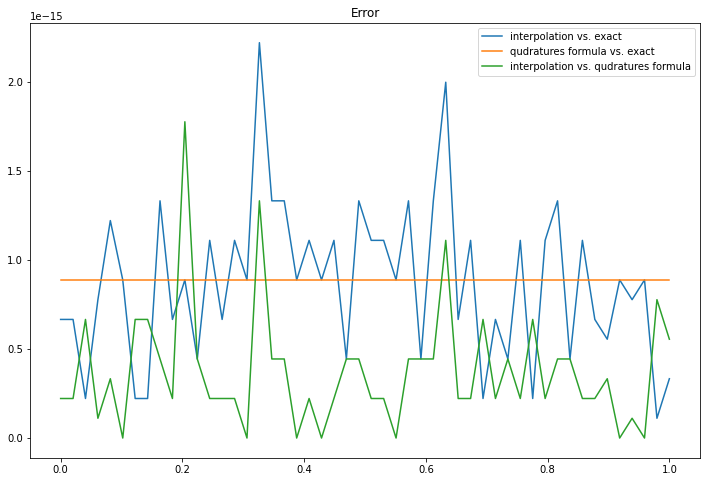

In [0]:
interpolation_func = lagrange_pol(z, nodes, result, len(result)-1)
quadratures_func = func(z, n=17)
exact_func = exact_result(z)

plt.figure(figsize=[12,8])
plt.plot(z, abs(interpolation_func-exact_func), label='interpolation vs. exact')
plt.plot(z, abs(quadratures_func-exact_func), label='qudratures formula vs. exact')
plt.plot(z, abs(interpolation_func-quadratures_func), label='interpolation vs. qudratures formula')
plt.title('Error')
plt.legend()
plt.show()

Интерполяция и предложенная формула достаточно хорошо описывают решение уравнения Фредгольма (ошибка по сравнению с точным решением ~ 1e-15 - 1e-16). Интересно также заметить, что ошибка, вылезающая при использовании формулы, является константой, в то время как ошибка при интерполяции на равномерной сетке скачет, хоть и не значительно.